# 통계학 기말프로젝트
### 2020131017 장윤태

프로젝트 주제 : 국가별 GDP와 코로나 확진자 및 사망자 간의 연관성

프로젝트 동기 : 코로나의 장기화 및 백신 보급이 이뤄지면서 국가 별 인프라 혹은 경제 수준이 국가 별 코로나 사망자 수에 영향을 미친다는 정보를 들었다. 이 정보 뿐만 아니라 그 외의 정보들을 통계학에서 배운 내용을 활용해 검증해보고자 한다.

프로젝트 과정 : 국가별 GDP, 인구정보 및 국가별 코로나 확진자, 사망자, 백신 접종자 수에 대한 정보를 크롤링한 후 각각의 분포를 파악한다. 그 후 서로 간의 상관관계를 분석하여 연관성있는 항목을 찾는다.

In [1]:
#코랩에서 구글 드라이브에 접속할 수 있는 권한 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 사용할 패키지 import

In [2]:
#웹사이트로부터 html문서 요청 패키지 불러오기
import requests

#정규식 지정 패키지 불러오기
import re

#로컬 파일 접속 패키지 불러오기
import os

#html문서에서 추출 함수 불러오기
from bs4 import BeautifulSoup

#데이터를 처리할 프레임 패키지 불러오기
import pandas as pd

#수학 연산을 처리할 패키지 불러오기
import numpy as np

#그래프와 같은 그림 그리는 패키지 불러오기
import matplotlib.pyplot as plt

#그래프와 같은 그림 그리는 패키지 불러오기
import seaborn as sns 

#그림그리는 패키지에서 한글 폰트 사용 함수 불러오기
import matplotlib.font_manager as fm

#사이킷런의 통계 함수 패키지 불러오기
from scipy import stats

# 2. 웹사이트 html문서 불러오기

### 국가별 GDP 현황 html문서 불러오기

In [ ]:
#html문서를 담을 리스트 형성
htmls = []

#html문서 요청을 위한 사용자 header 지정
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}

#html문서를 가져올 url지정
url = f'https://ko.wikipedia.org/wiki/%EB%AA%85%EB%AA%A9_%EA%B5%AD%EB%82%B4_%EC%B4%9D%EC%83%9D%EC%82%B0%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D'

#사용자 headers를 기반으로 국가별 gdp의 정보가 나와있는 html문서 불러오기
response = requests.get(url, headers=headers)

#불러온 html문서를 bs4의 html.parser방식으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

#변환한 html문서를 htmls 리스트에 추가
htmls.append(soup)

#제대로 불러왔는지 title 표시
print(soup.title)

<title>명목 국내 총생산순 나라 목록 - 위키백과, 우리 모두의 백과사전</title>


### 국가별 인구 현황 html문서 불러오기

In [ ]:
#html문서를 가져올 url지정
url = f'https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B5%AC%EC%88%9C_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D'

#사용자 headers를 기반으로 국가별 gdp의 정보가 나와있는 html문서 불러오기
response = requests.get(url, headers=headers)

#불러온 html문서를 bs4의 html.parser방식으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

#변환한 html문서를 htmls 리스트에 추가
htmls.append(soup)

#제대로 불러왔는지 title 표시
print(soup.title)

<title>인구순 나라 목록 - 위키백과, 우리 모두의 백과사전</title>


### 국가별 코로나 현황 html문서 불러오기

In [ ]:
#html문서를 가져올 url지정
url = f'https://www.worldometers.info/coronavirus/?'

#사용자 headers를 기반으로 국가별 코로나 현황 정보가 나와있는 html문서 불러오기
response = requests.get(url, headers=headers)

#불러온 html문서를 bs4의 html.parser방식으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

#변환한 html문서를 htmls 리스트에 추가
htmls.append(soup)

#제대로 불러왔는지 title 표시
print(soup.title)

<title>COVID Live Update: 263,796,741 Cases and 5,242,874 Deaths from the Coronavirus - Worldometer</title>


### 국가별 코로나 백신 접종 현황 html문서 불러오기

In [ ]:
#html문서를 가져올 url지정
url = f'https://www.google.com/search?q=%EC%A0%84%EC%84%B8%EA%B3%84+%EC%BD%94%EB%A1%9C%EB%82%9819+%EB%B0%B1%EC%8B%A0+%ED%86%B5%EA%B3%84&sxsrf=AOaemvImPB-a_UbZLJXdJBKnuALjzi-Xvg%3A1638428749846&ei=TXCoYeKLM-esmAXlybToBA&ved=0ahUKEwii5v7cxsT0AhVnFqYKHeUkDU0Q4dUDCA4&uact=5&oq=%EC%A0%84%EC%84%B8%EA%B3%84+%EC%BD%94%EB%A1%9C%EB%82%9819+%EB%B0%B1%EC%8B%A0+%ED%86%B5%EA%B3%84&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEM0CMgUIABDNAjIFCAAQzQI6BwgjELADECc6CQgAELADEAgQHjoHCCMQsAIQJzoICAAQCBANEB5KBAhBGAFQ5AFY8wpgpQxoAnAAeACAAXWIAcYGkgEDMy41mAEAoAEByAECwAEB&sclient=gws-wiz'

#사용자 headers를 기반으로 국가별 코로나 현황 정보가 나와있는 html문서 불러오기
response = requests.get(url, headers=headers)

#불러온 html문서를 bs4의 html.parser방식으로 변환
soup = BeautifulSoup(response.text, 'html.parser')

#변환한 html문서를 htmls 리스트에 추가
htmls.append(soup)

#제대로 불러왔는지 title 표시
print(soup.title)

<title>전세계 코로나19 백신 통계 - Google Search</title>


# 3. 데이터 전처리

### 국가별 gdp 데이터 전처리

In [ ]:
#국가와 gdp를 넣을 빈 리스트 생성
country = []
gdp = []

#국가와 gdp가 나와있는 태그만을 찾아 국가인 경우 국가명을 국가 리스트에 추가, gdp인 경우 gdp를 gdp 리스트에 추가
for i in htmls[0].select('table > tbody > tr > td > span')[194:566]:
  #gdp의 경우 text 추출 시 숫자가 존재하고 국가의 경우 text 추출 시 아무것도 없으므로 이를 통해 구분
  if i.text:
    gdp.append(int(''.join(i.text.split(','))))
  else:
    #국가명하고 (년도)가 나와있는 경우 존재해 국가명만 추출
    if '(' in i.a['title']:
      name = i.a['title'].split('(')[0]
      #사이트별로 국가명의 띄어쓰기를 다르게하기에 공백을 제거함으로써 통일
      name = ''.join(name.split(' '))
      country.append(name)
    else:
      country.append(i.a['title'])

#국가명은 없으나 gdp가 있어 제외
gdp.remove(105422)

#위 에러로 인해 아래 행의 국가명이 나오지 않아 추가 
country.insert(60, '푸에르토리코')

#국가명 리스트 길이와 gdp 리스트 길이가 일치하는지 확인함으로써 검증
print(len(country))
print(len(gdp))

186
186


In [ ]:
#국가 및 gdp 리스트를 데이터프레임화
gdp_dict = {'국가명' : country, 'GDP' : gdp}
gdp_df = pd.DataFrame(gdp_dict)

#데이터프레임화가 됐는지 검증
gdp_df.head()

,국가명,GDP
0,미국,21427700
1,중화인민공화국,14342903
2,일본,5081770
3,독일,3845630
4,인도,2875142


In [ ]:
#공백 데이터가 존재하는지 검증
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가명     186 non-null    object
 1   GDP     186 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


### 국가별 인구 데이터 전처리

In [ ]:
#국가와 인구수를 넣을 빈 리스트 생성
country = []
population = []

#국가와 인구수가 tr 태그로 묶여져 있기에 해당 태그를 모두 찾은 후 하나씩 정보 추출
for i in htmls[1].select('table > tbody > tr')[:240]:
  #tr 태그 내에서 td 태그 중 인구수에 해당되는게 인덱스 1로 이를 추출
  popu = i('td')[1].text
  #추출한 인구수를 ,제거 및 정수형으로 변환
  popu = int(''.join(popu.split(',')))
  #인구수를 인구 리스트에 추가
  population.append(popu)
  #tr 태그 내에서 td 태그 중 국가명에 해당되는게 인덱스 0이며 a 태그 중 인덱스 1의 text로 이를 추출
  name = i('td')[0]('a')[1].text
  #사이트별로 국가명의 띄어쓰기를 다르게하기에 공백을 제거함으로써 통일
  name = ''.join(name.split(' '))
  country.append(name)

#국가명 리스트 길이와 인구수 리스트 길이가 일치하는지 확인함으로써 검증
print(len(country))
print(len(population))

240
240


In [ ]:
#국가 및 인구수 리스트를 데이터프레임화
popu_dict = {'국가명' : country, '인구수' : population}
popu_df = pd.DataFrame(popu_dict)

#데이터프레임화가 됐는지 검증
popu_df.head()

,국가명,인구수
0,중국,1411718724
1,인도,1379619774
2,미국,332915074
3,인도네시아,276361788
4,파키스탄,225199929


In [ ]:
#공백데이터가 존재하는지 검증
popu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가명     240 non-null    object
 1   인구수     240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


### 국가별 코로나 현황 데이터 전처리

In [ ]:
#코로나 현황 사이트는 국가명이 영어로 표기되기에 파파고 api를 이용해 한국어로 번역하는 함수 생성
def get_translate_etok(text):
  #파파고 api를 사용할 사용자 id와 코드 입력
  client_id = "j3f8zrLyKM0fhEKu0H0W"
  client_secret = "oJffUyHgQa"
  #번역할 데이터와 언어 지정
  data = {'text' : text,
          'source' : 'en',
          'target': 'ko'}
  #파파고 api를 사용할 url 지정
  url = "https://openapi.naver.com/v1/papago/n2mt"
  #사용자 id 및 코드를 헤더로 입력
  header = {"X-Naver-Client-Id":client_id,
            "X-Naver-Client-Secret":client_secret}
  #requests 함수를 통해 파파고 url에 헤더와 번역할 내용 전송
  response = requests.post(url, headers=header, data=data)
  #응답코드 저장
  rescode = response.status_code
  #에러가 뜨는 경우 에러 코드를 출력하도록 조건문 생성
  if(rescode==200):
      send_data = response.json()
      trans_data = (send_data['message']['result']['translatedText'])
      return trans_data
  else:
      print("Error Code:" , rescode)

In [ ]:
#국가, 확진자수, 사망자수를 넣을 빈 리스트 생성
country = []
confirm = []
death = []

#국가와 인구수가 tr 태그로 묶여져 있기에 해당 태그를 모두 찾은 후 하나씩 정보 추출
for i in htmls[2].select('table > tbody > tr')[:231]:
  #tr 태그 내에서 td 태그 중 국가명에 해당되는게 인덱스 0이며 a 태그 중 인덱스 1의 text로 이를 추출
  name = i('td')[1].text
  #이 사이트는 국가명 양쪽으로 공백이 있기에 공백제거
  name = name.strip()
  #이 사이트는 국가명이 영어이기에 파파고 api를 활용해 한국어로 번역
  name = get_translate_etok(name)
  #사이트별로 국가명의 띄어쓰기를 다르게하기에 공백을 제거함으로써 통일(국가명이 공백인 경우가 존재하여 이는 continue 처리)
  try:
    name = ''.join(name.split(' '))
  except:
    continue
  #파파고 번역으로 인해 국가명 뒤에 .이 추가되는 경우 존재
  if name[-1] == '.':
    name = name[:-1]
  #국가명을 국가 리스트에 추가
  country.append(name)
  #tr 태그 내에서 td 태그 중 확진자수에 해당되는게 인덱스 2로 이를 추출
  conf = i('td')[2].text
  #추출한 확진자수를 ,제거 및 정수형으로 변환
  conf = int(''.join(conf.split(',')))
  #확진자수를 확진자수 리스트에 추가
  confirm.append(conf)
  #tr 태그 내에서 td 태그 중 사망자수에 해당되는게 인덱스 4로 이를 추출
  die = i('td')[4].text
  #사망자가 없는 국가의 경우 0 값으로 추가
  if die == ' ':
    death.append(0)
  else:
    #추출한 사망자수를 ,제거 및 정수형으로 변환
    die = int(''.join(die.split(',')))
    #사망자수를 사망자수 리스트에 추가
    death.append(die)

#국가명 리스트 길이와 인구 리스트 길이가 일치하는지 확인함으로써 검증
print(len(country))
print(len(confirm))
print(len(death))

Error Code: 400
230
230
230


In [ ]:
#국가, 확진자수 및 사망자수 리스트를 데이터프레임화
corona_dict = {'국가명' : country, '확진자수' : confirm, '사망자수' : death}
corona_df = pd.DataFrame(corona_dict)

#데이터프레임화가 됐는지 검증
corona_df.head()

,국가명,확진자수,사망자수
0,북아메리카,59282891,1196385
1,아시아,82226824,1215571
2,남아메리카,39007037,1182433
3,유럽,74155132,1420355
4,아프리카,8748400,223815


In [ ]:
#공백 데이터가 존재하는지 검증
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국가명     230 non-null    object
 1   확진자수    230 non-null    int64 
 2   사망자수    230 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


### 국가별 코로나 백신 현황 데이터 전처리

In [ ]:
#국가와 백신 접종비율을 넣을 빈 리스트 생성
country = []
vaccine = []

#국가와 접종비율이 tr 태그로 묶여져 있기에 해당 태그를 모두 찾은 후 하나씩 정보 추출
for i in htmls[3].select('table > tbody > tr')[:191]:
  #tr 태그 내에서 td 태그 중 국가명에 해당되는게 인덱스 0이며 span 태그 중 첫 번째의 text로 이를 추출
  name = i('td')[0]('span')[0].text
  #국가명하고 (세부내용)이 나와있는 경우 존재해 국가명만 추출
  if '(' in name:
    name = name.split('(')[0]
  else:
    pass
  #이 사이트는 국가명이 영어이기에 파파고 api를 활용해 한국어로 번역
  name = get_translate_etok(name)
  #사이트별로 국가명의 띄어쓰기를 다르게하기에 공백을 제거함으로써 통일
  name = ''.join(name.split(' '))
  #파파고 번역으로 인해 국가명 뒤에 .이 추가되는 경우 존재
  if name[-1] == '.':
    name = name[:-1]
  #국가명을 국가 리스트에 추가
  country.append(name)
  #tr 태그 내에서 td 태그 중 접종비율에 해당되는게 인덱스 3, span 태그 중 첫 번재의 text로 이를 추출(중국만 공백으로 처리되어 있어 이는 따로 처리)
  try:
    vac = i('td')[3]('span')[0].text[:-1]
  except:
    vaccine.append(75.8)
    continue
  #추출한 접종비율은 % 형태로 실수형으로 변환
  vac = float(vac)
  #접종비율을 백신 리스트에 추가
  vaccine.append(vac)

#국가명 리스트 길이와 인구수 리스트 길이가 일치하는지 확인함으로써 검증
print(len(country))
print(len(vaccine))

191
191


In [ ]:
#국가 및 접종비율 리스트를 데이터프레임화
vac_dict = {'국가명' : country, '접종비율' : vaccine}
vac_df = pd.DataFrame(vac_dict)

#데이터프레임화가 됐는지 검증
vac_df.head()

,국가명,접종비율
0,중국,75.8
1,인도,32.5
2,미국,59.4
3,브라질,63.0
4,인도네시아,34.5


In [ ]:
#공백 데이터가 존재하는지 검증
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가명     191 non-null    object 
 1   접종비율    191 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


### 생성한 데이터프레임 파일로 생성

검증하고하는 주제가 국가 gdp에 따른 코로나 확진자수 및 백신 접종자수로 코로나 확진자 데이터가 없는 국가, 백신 접종자 데이터가 없는 국가를 기준으로 데이터프레임 병합한다.

In [ ]:
#국가별 gdp 및 인구수 데이터프레임 병합
df = pd.merge(gdp_df, popu_df, how = 'inner', on = '국가명')
df.head()

,국가명,GDP,인구수
0,미국,21427700,332915074
1,일본,5081770,125960000
2,독일,3845630,83783942
3,인도,2875142,1379619774
4,영국,2827113,67886011


In [ ]:
#최종 데이터프레임 및 코로나 현황 데이터프레임 병합
df = pd.merge(df, corona_df, how = 'inner', on = '국가명')
df.head()

,국가명,GDP,인구수,확진자수,사망자수
0,미국,21427700,332915074,49573122,805004
1,일본,5081770,125960000,1727430,18362
2,독일,3845630,83783942,5953310,102552
3,인도,2875142,1379619774,34606541,469724
4,영국,2827113,67886011,10276007,145140


In [ ]:
#최종 데이터프레임 및 코로나 백신 데이터프레임 병합
df = pd.merge(df, vac_df, how = 'inner', on = '국가명')
df.head()

,국가명,GDP,인구수,확진자수,사망자수,접종비율
0,미국,21427700,332915074,49573122,805004,59.4
1,일본,5081770,125960000,1727430,18362,77.4
2,독일,3845630,83783942,5953310,102552,68.5
3,인도,2875142,1379619774,34606541,469724,32.5
4,영국,2827113,67886011,10276007,145140,69.0


### 추가 데이터 전처리

객관적인 비교를 위해 각 국가별 GDP, 확진자수, 사망자수를 인구수로 나눠 접종비율과 같이 비율로 나타낸다.

In [ ]:
#1인당 GDP 칼럼 생성(사이트에 백만달러가 단위이기에 GDP에 백만을 곱한다.)
df['1인당 GDP'] = df['GDP'] * 1000000 / df['인구수']

#확진비율 칼럼 생성
df['확진비율'] = df['확진자수'] / df['인구수'] * 100

#사망비율 칼럼 생성
df['사망비율'] = df['사망자수'] / df['인구수'] * 100

#칼럼이 제대로 생성됐는지 확인
df.head()

In [16]:
#생성한 최종 데이터프레임 파일로 생성
df[['국가명', '1인당 GDP', '접종비율', '확진비율', '사망비율']].to_excel('/content/drive/MyDrive/통계학 기말과제 국가별 gdp 및 코로나 데이터.xlsx', index = False)

#4. 데이터 분포 확인

In [3]:
#최종 데이터프레임 파일 로드
df = pd.read_excel('/content/drive/MyDrive/통계학 기말과제 국가별 gdp 및 코로나 데이터.xlsx')

#제대로 로드됐는지 확인
df.head()

,국가명,1인당 GDP,접종비율,확진비율,사망비율
0,미국,64363.862358,59.4,14.890621,0.241805
1,일본,40344.315656,77.4,1.371412,0.014578
2,독일,45899.368163,68.5,7.105550,0.122401
3,인도,2084.010431,32.5,2.508411,0.034047
4,영국,41645.001059,69.0,15.137150,0.213800


In [9]:
#데이터들의 기초 통계량인 평균, 표준편차, 4분위수 확인
df.describe()

,1인당 GDP,접종비율,확진비율,사망비율
count,151.000000,151.000000,151.000000,151.000000
mean,15329.447487,41.173510,6.204500,0.098506
std,20476.726822,26.969792,6.048078,0.104902
min,426.549775,0.400000,0.000997,0.000000
25%,2097.619013,14.800000,0.574304,0.013179
50%,6109.290207,42.600000,5.032332,0.066322
75%,19483.656226,64.900000,10.120234,0.162021
max,115826.184977,89.300000,25.324772,0.619089


기초통계량만 봤을 때는 평균, 분산, 4분위수 모두 다르기에 네 집단 간에 유사성이 없는 것으로 보인다.

단일 데이터들이 정규분포를 띠는지 확인 <br>
box plot, histogram, skewtest, kurtosistest, normaltest, jarqueberatest, shapirotest

In [51]:
#한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#나눔고딕으로 matplotlib 폰트 설정
plt.rc('font',family='NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,364 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

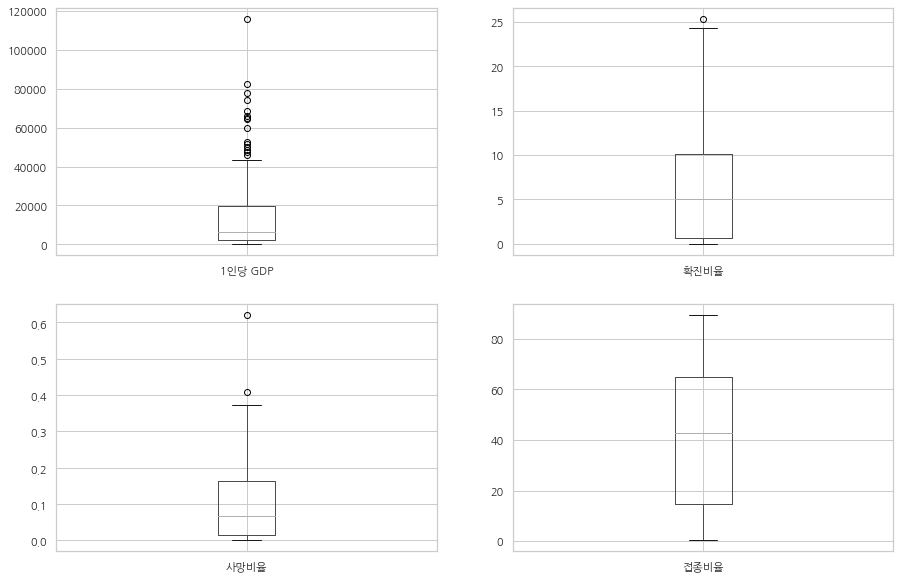

In [28]:
#전체 데이터의 박스플랏 생성
#전체 plot 사이즈 지정
plt.figure(figsize=(15,10))

#첫 번째 plot 지정
plt.subplot(2, 2, 1)
df.boxplot('1인당 GDP')

#두 번째 plot 지정
plt.subplot(2, 2, 2)
df.boxplot('확진비율')

#세 번째 plot 지정
plt.subplot(2, 2, 3)
df.boxplot('사망비율')

#네 번째 plot 지정
plt.subplot(2, 2, 4)
df.boxplot('접종비율')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6887ba2b90>,
      dtype=object)

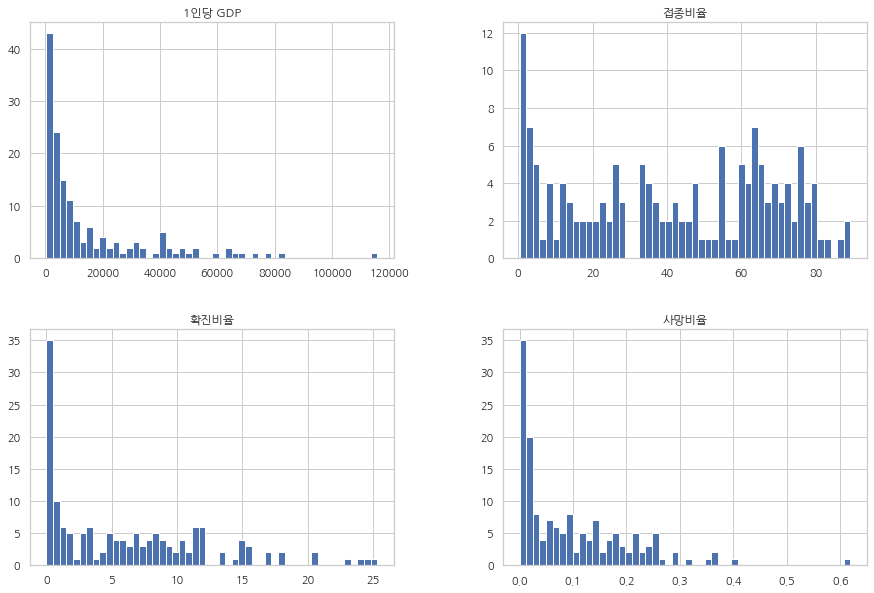

In [39]:
#전체 데이터의 히스토그램 생성
df.hist(figsize = (15, 10), bins = 50)

4개 데이터 집단의 분포를 박스플랏과 히스토그램으로 봤을 때 정규분포의 형태가 아니나 다른 분포로의 유사성은 나타나는 것으로 보인다.

In [41]:
#1인당 GDP 데이터의 skew test
_, pval = stats.skewtest(np.array(df['1인당 GDP']))
print(f"1인당 GDP의 pval : {pval}")

#접종비율 데이터의 skew test
_, pval = stats.skewtest(np.array(df['접종비율']))
print(f"접종비율의 pval : {pval}")

#확진비율의 skew test
_, pval = stats.skewtest(np.array(df['확진비율']))
print(f"확진비율의 pval : {pval}")

#사망비율의 skew test
_, pval = stats.skewtest(np.array(df['사망비율']))
print(f"사망비율의 pval : {pval}")

1인당 GDP의 pval : 3.875179895588504e-13
접종비율의 pval : 0.7079728025990508
확진비율의 pval : 6.195141613222321e-06
사망비율의 pval : 1.4182926890073933e-09


접종비율 집단은 pval가 0.5를 초과하므로 중간값과 평균값의 차이가 없다는 귀무가설을 채택하나 그 외 집단은 0.5 미만으로 중간값과 평균값의 차이가 존재한다는 대립가설을 채택한다.

In [42]:
#1인당 GDP 데이터의 kurtosis test
_, pval = stats.kurtosistest(np.array(df['1인당 GDP']))
print(f"1인당 GDP의 pval : {pval}")

#접종비율 데이터의 kurtosis test
_, pval = stats.kurtosistest(np.array(df['접종비율']))
print(f"접종비율의 pval : {pval}")

#확진비율의 kurtosis test
_, pval = stats.kurtosistest(np.array(df['확진비율']))
print(f"확진비율의 pval : {pval}")

#사망비율의 kurtosis test
_, pval = stats.kurtosistest(np.array(df['사망비율']))
print(f"사망비율의 pval : {pval}")

1인당 GDP의 pval : 2.536843007844659e-06
접종비율의 pval : 4.88338677460066e-38
확진비율의 pval : 0.1589629872071303
사망비율의 pval : 3.402924076213332e-05


확진비율 집단은 pval가 0.5를 초과하므로 K값이 정규분포의 K값인 3과 차이가 없다는 귀무가설을 채택하나 그 외 집단은 0.5 미만으로 차이가 존재한다는 대립가설을 채택한다.

In [44]:
#1인당 GDP 데이터의 normal test
_, pval = stats.kurtosistest(np.array(df['1인당 GDP']))
print(f"1인당 GDP의 pval : {pval}")

#접종비율 데이터의 normal test
_, pval = stats.normaltest(np.array(df['접종비율']))
print(f"접종비율의 pval : {pval}")

#확진비율의 normal test
_, pval = stats.normaltest(np.array(df['확진비율']))
print(f"확진비율의 pval : {pval}")

#사망비율의 normal test
_, pval = stats.normaltest(np.array(df['사망비율']))
print(f"사망비율의 pval : {pval}")

1인당 GDP의 pval : 2.536843007844659e-06
접종비율의 pval : 7.400572138510754e-37
확진비율의 pval : 1.3599146574895648e-05
사망비율의 pval : 2.054603195528273e-12


네 집단 모두 pval가 0.05 미만이므로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택한다.

In [45]:
#1인당 GDP 데이터의 jarque_bera test
_, pval = stats.jarque_bera(np.array(df['1인당 GDP']))
print(f"1인당 GDP의 pval : {pval}")

#접종비율 데이터의 jarque_bera test
_, pval = stats.jarque_bera(np.array(df['접종비율']))
print(f"접종비율의 pval : {pval}")

#확진비율의 jarque_bera test
_, pval = stats.jarque_bera(np.array(df['확진비율']))
print(f"확진비율의 pval : {pval}")

#사망비율의 jarque_bera test
_, pval = stats.jarque_bera(np.array(df['사망비율']))
print(f"사망비율의 pval : {pval}")

1인당 GDP의 pval : 0.0
접종비율의 pval : 0.0027768774093495097
확진비율의 pval : 1.1691854426842951e-06
사망비율의 pval : 0.0


네 집단 모두 pval가 0.05 미만이므로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택한다.

In [46]:
#1인당 GDP 데이터의 shapiro test
_, pval = stats.shapiro(np.array(df['1인당 GDP']))
print(f"1인당 GDP의 pval : {pval}")

#접종비율 데이터의 shapiro test
_, pval = stats.shapiro(np.array(df['접종비율']))
print(f"접종비율의 pval : {pval}")

#확진비율의 shapiro test
_, pval = stats.shapiro(np.array(df['확진비율']))
print(f"확진비율의 pval : {pval}")

#사망비율의 shapiro test
_, pval = stats.shapiro(np.array(df['사망비율']))
print(f"사망비율의 pval : {pval}")

1인당 GDP의 pval : 1.3368788769150403e-15
접종비율의 pval : 6.998612889219658e-07
확진비율의 pval : 1.1603558114359203e-09
사망비율의 pval : 1.630544137209977e-11


네 집단 모두 pval가 0.05 미만이므로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택한다. <br>
따라서 네 집단은 정규분포를 따르지 않는다는 사실을 확인하였다.

#5. 데이터 상관관계 확인

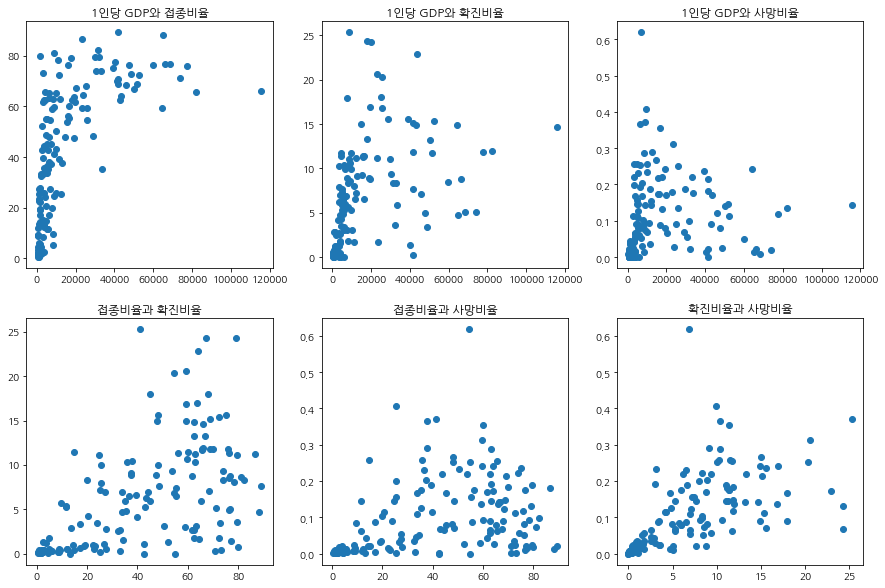

In [8]:
#전체 데이터간 산점도 생성
#전체 plot 사이즈 지정
plt.figure(figsize=(15, 10))

#첫 번째 plot 지정
plt.subplot(2, 3, 1)
plt.title('1인당 GDP와 접종비율')
plt.scatter(df['1인당 GDP'], df['접종비율'])

#두 번째 plot 지정
plt.subplot(2, 3, 2)
plt.title('1인당 GDP와 확진비율')
plt.scatter(df['1인당 GDP'], df['확진비율'])

#세 번째 plot 지정
plt.subplot(2, 3, 3)
plt.title('1인당 GDP와 사망비율')
plt.scatter(df['1인당 GDP'], df['사망비율'])

#네 번째 plot 지정
plt.subplot(2, 3, 4)
plt.title('접종비율과 확진비율')
plt.scatter(df['접종비율'], df['확진비율'])

#다섯 번째 plot 지정
plt.subplot(2, 3, 5)
plt.title('접종비율과 사망비율')
plt.scatter(df['접종비율'], df['사망비율'])

#여섯 번째 plot 지정
plt.subplot(2, 3, 6)
plt.title('확진비율과 사망비율')
plt.scatter(df['확진비율'], df['사망비율'])

일직선 형태로 뚜렷한 데이터 분포가 나타나지 않으나 GDP와 다른 데이터 간에는 가파른 일직선에 몰려있고 그 외에 부채꼴 모양으로 데이터 분포가 약간 퍼져있으며 접종비율, 확진비율, 사망비율 간에는 아랫쪽 방향의 부채꼴 모양의 분포가 나타나는 것으로 보아 서로 간에 어느 정도의 상관관계가 있는 것으로 여겨진다.

데이터 간 구체적인 상관관계 확인 <br>
피어슨 상관계수 표 활용

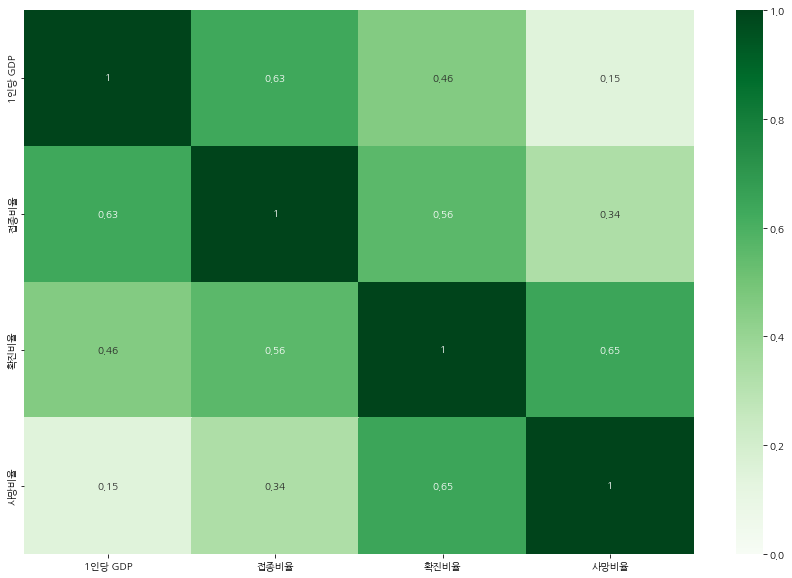

In [12]:
#데이터들간 상관계수 계산
corr = df.corr(method = 'pearson')

#피어슨 상관계수 표 생성
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(corr,
           annot = True,
           cmap = 'Greens',
           vmin = 0, vmax=1, 
          )

피어슨 상관계수 표를 통해 상관계수가 0.6을 넘는 (1인당 GDP, 접종비율), (확진비율, 사망비율) 간에는 확실한 종속 관계가, 그 외의 데이터들 간에는 약한 종속 관계가 있다고 볼 수 있다. <br>
이제 통계 테스트를 이용해 구체적으로 분석이 이뤄지며 전체 데이터는 연속형 데이터이고 nonnormality하므로 test 시행시 numeric data의 nonparametric의 test를 사용한다.

데이터 간의 상관관계 확인 <br>
spearman's R test 실시

In [15]:
#1인당 GDP와 접종비율 간의 spearmanr test
_, pval = stats.spearmanr(df['1인당 GDP'], df['접종비율'])
print(f"1인당 GDP와 접종비율 간의 pval : {pval}")

#1인당 GDP와 확진비율 간의 spearmanr test
_, pval = stats.spearmanr(df['1인당 GDP'], df['확진비율'])
print(f"1인당 GDP와 확진비율 간의 pval : {pval}")

#1인당 GDP와 사망비율 간의 spearmanr test
_, pval = stats.spearmanr(df['1인당 GDP'], df['사망비율'])
print(f"1인당 GDP와 사망비율 간의 pval : {pval}")

#접종비율과 확진비율 간의 spearmanr test
_, pval = stats.spearmanr(df['확진비율'], df['접종비율'])
print(f"접종비율과 확진비율 간의 pval : {pval}")

#접종비율과 사망비율 간의 spearmanr test
_, pval = stats.spearmanr(df['접종비율'], df['사망비율'])
print(f"접종비율과 사망비율 간의 pval : {pval}")

#확진비율과 사망비율 간의 spearmanr test
_, pval = stats.spearmanr(df['확진비율'], df['사망비율'])
print(f"확진비율과 사망비율 간의 pval : {pval}")

1인당 GDP와 접종비율 간의 pval : 2.597240221890674e-36
1인당 GDP와 확진비율 간의 pval : 1.287212904358471e-29
1인당 GDP와 사망비율 간의 pval : 3.70444169183012e-14
접종비율과 확진비율 간의 pval : 1.5729070785450133e-18
접종비율과 사망비율 간의 pval : 8.731466185236383e-09
확진비율과 사망비율 간의 pval : 1.7828246549734355e-43


두 집단 데이터들 간에 모두 pval가 0.05 미만이므로 두 집단 간에 상관관계가 있다는 대립가설을 채택한다. <br>
전체 데이터들 간에 상관관계가 있다는 놀라운 결과가 나왔는데 이는 코로나 발병으로 인해 확진, 사망, 접종의 전체적인 흐름이 같이 증가하기 때문에 기본적인 상관관계가 존재하고 이것이 반영된 것으로 보인다. <br>
그래도 피어슨 상관계수 표에서 알 수 있듯이 우리가 예상했던 접종비율과 1인당 GDP, 접종비율과 사망비율 간에는 뚜렷한 연관성이 있음을 알 수 있다. <br>
앞으로는 데이터들이 같은 분포를 띠는지 test가 진행될 예정이며 데이터들간에는 종속관계가 있으므로 paired sample의 test를 사용한다.

전체 데이터들 간에 동일 분포인지 확인 <br>
Paired Wilcoxen Signed-Rank test 실시

In [20]:
#1인당 GDP와 접종비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['1인당 GDP'], df['접종비율'], zero_method="pratt")
print(f"1인당 GDP와 접종비율 간의 pval : {pval}")

#1인당 GDP와 확진비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['1인당 GDP'], df['확진비율'], zero_method="pratt")
print(f"1인당 GDP와 확진비율 간의 pval : {pval}")

#1인당 GDP와 사망비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['1인당 GDP'], df['사망비율'], zero_method="pratt")
print(f"1인당 GDP와 사망비율 간의 pval : {pval}")

#접종비율과 확진비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['확진비율'], df['접종비율'], zero_method="pratt")
print(f"접종비율과 확진비율 간의 pval : {pval}")

#접종비율과 사망비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['접종비율'], df['사망비율'], zero_method="pratt")
print(f"접종비율과 사망비율 간의 pval : {pval}")

#확진비율과 사망비율 간의 wilcoxon test
_, pval = stats.wilcoxon(df['확진비율'], df['사망비율'], zero_method="pratt")
print(f"확진비율과 사망비율 간의 pval : {pval}")

1인당 GDP와 접종비율 간의 pval : 1.5753513023728927e-26
1인당 GDP와 확진비율 간의 pval : 1.5753513023728927e-26
1인당 GDP와 사망비율 간의 pval : 1.5753513023728927e-26
접종비율과 확진비율 간의 pval : 1.5753513023728927e-26
접종비율과 사망비율 간의 pval : 1.5753513023728927e-26
확진비율과 사망비율 간의 pval : 1.5753513023728927e-26


두 집단 데이터들 간에는 모두 pval이 0.05 미만으로 두 집단은 동일하지 않은 분포를 띤다는 대립가설을 채택한다.

상관계수가 0.6보다 낮았던 데이터들간에는 독립이라고 가정하고 추가적으로 동일 분포인지 확인 <br>
Mann-Whitney test 실시

In [23]:
#1인당 GDP와 확진비율 간의 mannwhitneyu test
_, pval = stats.mannwhitneyu(df['1인당 GDP'], df['확진비율'])
print(f"1인당 GDP와 확진비율 간의 pval : {pval}")

#1인당 GDP와 사망비율 간의 mannwhitneyu test
_, pval = stats.mannwhitneyu(df['1인당 GDP'], df['사망비율'])
print(f"1인당 GDP와 사망비율 간의 pval : {pval}")

#접종비율과 확진비율 간의 mannwhitneyu test
_, pval = stats.mannwhitneyu(df['확진비율'], df['접종비율'])
print(f"접종비율과 확진비율 간의 pval : {pval}")

#접종비율과 사망비율 간의 mannwhitneyu test
_, pval = stats.mannwhitneyu(df['접종비율'], df['사망비율'])
print(f"접종비율과 사망비율 간의 pval : {pval}")

1인당 GDP와 확진비율 간의 pval : 2.540870257033502e-51
1인당 GDP와 사망비율 간의 pval : 2.54080751191977e-51
접종비율과 확진비율 간의 pval : 2.9117640754885746e-30
접종비율과 사망비율 간의 pval : 2.6959306833574575e-51


두 집단 데이터들 간에는 모두 pval이 0.05 미만으로 두 집단은 동일하지 않은 분포를 띤다는 대립가설을 채택한다. <br>
모든 데이터들 간에는 유의미한 상관관계가 있으나 동일한 분포가 나타나지 않음을 알 수 있다. 이는 데이터들 간의 단위가 다르기에 나타난 것으로 보이며 각 데이터마다 히스토그램에서 봤듯이 표준화시킨다면 동일한 분포가 나올 것으로 예상이 된다.

#6. (추가) 표본 및 표본평균의 분포 확인

추가로 표본과 표본평균들의 분포를 확인해보고자 그나마 균일하게 분포돼 있는 접종비율에서 임의로 표본을 추출하여 활용한다.

In [28]:
#접종비율에서 1000개의 표본 샘플 추출
sample = pd.DataFrame({
    'sample_mean_05': [df['접종비율'].sample(5).mean() for _ in range(1000)],
    'sample_mean_20': [df['접종비율'].sample(20).mean() for _ in range(1000)],
})



In [47]:
#데이터들의 기초 통계량인 평균, 표준편차, 4분위수 확인
sample.describe()

,sample_mean_05,sample_mean_20
count,1000.000000,1000.000000
mean,41.389980,41.150065
std,12.414809,5.618035
min,6.420000,25.150000
25%,32.705000,37.411250
50%,41.780000,41.255000
75%,50.520000,45.166250
max,72.580000,57.500000


추출한 20개 샘플 두 집단이 동일한 분포를 띠는지 확인 <br>
Mann-Whitney test 실시

In [46]:
#접종비율에서 20개 샘플 두 집단을 추출
sample_20 = pd.DataFrame({
    'vaccine1': df['접종비율'].sample(20),
    'vaccine2': df['접종비율'].sample(20)
})

In [42]:
#nonnormality한 모집단에서 추출한 두 표본집단 간의 mannwhitneyu test 실시
_, pval = stats.mannwhitneyu(sample_20['vaccine1'], sample_20['vaccine2'])
print(f"nonnormality한 모집단에서 추출한 두 표본집단 간의 pval : {pval}")

nonnormality한 모집단에서 추출한 두 표본집단 간의 pval : 0.40494651883434646


두 집단의 데이터 간에는 pval이 0.05를 초과하으로 두 집단은 동일한 분포라는 귀무가설을 채택한다.

추출한 표본 평균들이 정규분포를 띠는지 확인 <br>
box plot, histogram, skewtest, kurtosistest, normaltest, jarqueberatest, shapirotest

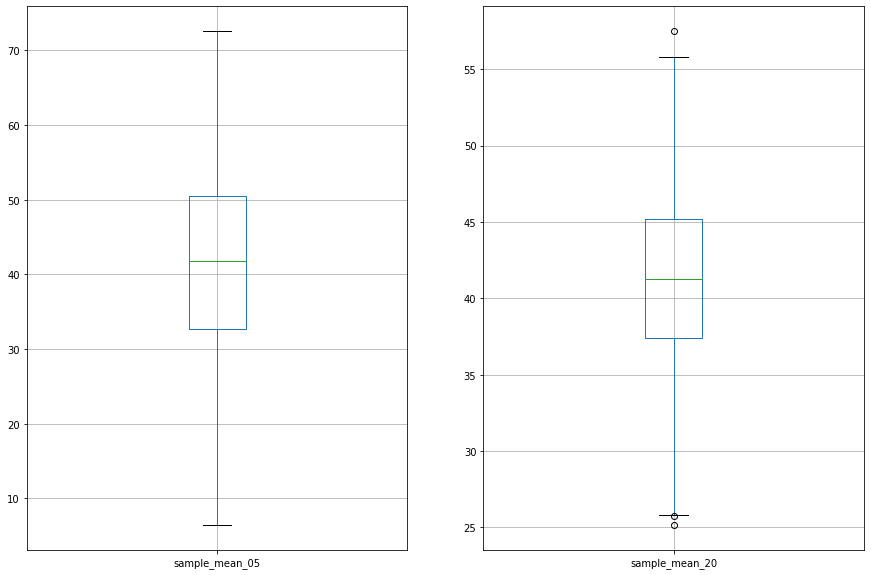

In [18]:
#전체 데이터의 박스플랏 생성
#전체 plot 사이즈 지정
plt.figure(figsize=(15,10))

#첫 번째 plot 지정
plt.subplot(1, 2, 1)
sample.boxplot('sample_mean_05')

#두 번째 plot 지정
plt.subplot(1, 2, 2)
sample.boxplot('sample_mean_20')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3e0dd9c50>,
      dtype=object)

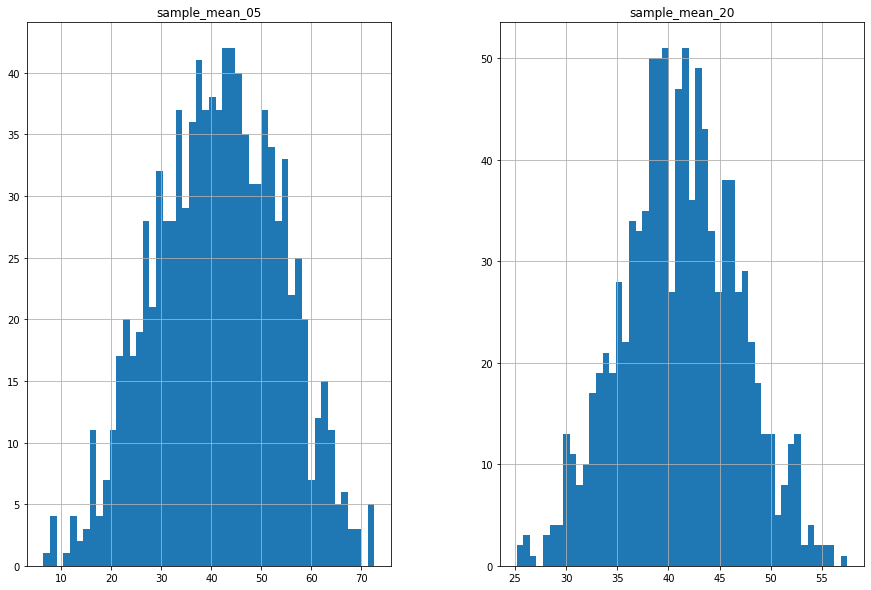

In [19]:
#표본평균 데이터의 히스토그램 생성
sample.hist(figsize = (15, 10), bins = 50)

임의로 5개, 20개씩 추출한 샘플 평균들을 박스플랏과 히스토그램으로 봤을 때 정규분포의 형태인 것처럼 보인다.

In [20]:
#5개 샘플 평균들의 skew test
_, pval = stats.skewtest(np.array(sample['sample_mean_05']))
print(f"sample_mean_05's pval : {pval}")

#20개 샘플 평균들의 skew test
_, pval = stats.skewtest(np.array(sample['sample_mean_20']))
print(f"sample_mean_20's pval : {pval}")

sample_mean_05's pval : 0.32164052811659705
sample_mean_20's pval : 0.8685217380679652


두 집단은 모두 pval가 0.05를 초과하므로 중간값과 평균값의 차이가 없다는 귀무가설을 채택한다.

In [21]:
#5개 샘플 평균들의 kurtosis test
_, pval = stats.kurtosistest(np.array(sample['sample_mean_05']))
print(f"sample_mean_05's pval : {pval}")

#20개 샘플 평균들의 kurtosis test
_, pval = stats.kurtosistest(np.array(sample['sample_mean_20']))
print(f"sample_mean_20's pval : {pval}")

sample_mean_05's pval : 0.0002472157609939327
sample_mean_20's pval : 0.09413913859044315


표본개수가 5개인 표본평균 집단은 pval가 0.05 미만으로 K값이 정규분포의 K값인 3과 차이가 존재한다는 대립가설을 채택하나 표본개수가 20개인 표본평균 집단은 pval가 0.05를 초과하므로 정규분포의 K값과 차이가 없다는 귀무가설을 채택한다.

In [22]:
#5개 샘플 평균들의 normal test
_, pval = stats.normaltest(np.array(sample['sample_mean_05']))
print(f"sample_mean_05's pval : {pval}")

#20개 샘플 평균들의 normal test
_, pval = stats.normaltest(np.array(sample['sample_mean_20']))
print(f"sample_mean_20's pval : {pval}")

sample_mean_05's pval : 0.000740851514297894
sample_mean_20's pval : 0.24298235965301704


표본개수가 5개인 표본평균 집단은 pval가 0.05 미만으로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택하나 표본개수가 20개인 표본평균 집단은 pval가 0.05를 초과하므로 데이터의 분포가 정규분포라는 귀무가설을 채택한다.

In [23]:
#5개 샘플 평균들의 jarque_bera test
_, pval = stats.jarque_bera(np.array(sample['sample_mean_05']))
print(f"sample_mean_05's pval : {pval}")

#20개 샘플 평균들의 jarque_bera test
_, pval = stats.jarque_bera(np.array(sample['sample_mean_20']))
print(f"sample_mean_20's pval : {pval}")

sample_mean_05's pval : 0.0094973481121301
sample_mean_20's pval : 0.29347054503761294


표본개수가 5개인 표본평균 집단은 pval가 0.05 미만으로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택하나 표본개수가 20개인 표본평균 집단은 pval가 0.05를 초과하므로 데이터의 분포가 정규분포라는 귀무가설을 채택한다.

In [24]:
#5개 샘플 평균들의 shapiro test
_, pval = stats.shapiro(np.array(sample['sample_mean_05']))
print(f"sample_mean_05's pval : {pval}")

#20개 샘플 평균들의 shapiro test
_, pval = stats.shapiro(np.array(sample['sample_mean_20']))
print(f"sample_mean_20's pval : {pval}")

sample_mean_05's pval : 0.008294115774333477
sample_mean_20's pval : 0.37569934129714966


표본개수가 5개인 표본평균 집단은 pval가 0.05 미만으로 데이터의 분포가 정규분포가 아니라는 대립가설을 채택하나 표본개수가 20개인 표본평균 집단은 pval가 0.05를 초과하므로 데이터의 분포가 정규분포라는 귀무가설을 채택한다.
<br> 따라서 표본개수가 클수록 정규분포를 띠는 중심극한정리를 확인하였다.


추출한 20개 표본평균 샘플 두 집단이 동일한 분포를 띠는지 확인 <br>
Two-sample Kolmogorov-Smirnov test 실시

In [63]:
#20개 샘플의 표본평균 집단에서 20개 샘플 두 집단을 추출
sample_mean_20 = pd.DataFrame({
    'vaccine1': sample['sample_mean_20'].sample(20),
    'vaccine2': sample['sample_mean_20'].sample(20)
})

In [49]:
#normality한 표본평균 모집단에서 추출한 두 표본평균 집단 간의 ks_2samp test 실시
_, pval = stats.ks_2samp(sample_mean_20['vaccine1'], sample_mean_20['vaccine2'])
print(f"normality한 모집단에서 추출한 두 표본집단 간의 pval : {pval}")

normality한 모집단에서 추출한 두 표본집단 간의 pval : 0.9188052214121167


두 집단의 데이터 간에는 pval이 0.05를 초과하으로 두 집단은 동일한 분포라는 귀무가설을 채택한다.

추출한 20개 표본평균 샘플의 평균이 표본평균 집단의 평균과 동일한지 확인(표본평균 집단의 표준편차를 모른다고 가정) <br>
one sample T test 실시(표본평균 집단의 평균은 위에서 확인한 기초통계량 참조)

In [66]:
#normality한 표본평균 모집단에서 추출한 표본평균 샘플의 t test 실시
_, pval = stats.ttest_1samp(sample['sample_mean_20'].sample(20), 41.150065)
print(f"모집단에서 추출한 표본집단의 pval : {pval}")

모집단에서 추출한 표본집단의 pval : 0.942838012657401


표본집단의 pval이 0.05를 초과하으로 표본집단의 평균이 모집단의 평균과 동일하다는 귀무가설을 채택한다.

추출한 20개 표본평균 샘플의 표준편차가 표본평균 집단의 표준편차와 동일한지 확인 <br>
Chi-Square test 실시(표본평균 집단의 표준편차는 위에서 확인한 기초통계량 참조)

In [67]:
#normality한 표본평균 모집단에서 임의로 20개 샘플 추출
a = sample['sample_mean_20'].sample(20)
sigma_0 = 5.618035

In [69]:
#샘플의 통계량 추출
stat = (a.shape[0] - 1) * a.var(ddof=1) / sigma_0**2
stat

17.817504188479642

In [70]:
#normality한 표본평균 모집단에서 추출한 표본평균 샘플의 Chi-Square test 실시
pval = 2 * min(
    stats.chi2(a.shape[0]-1).cdf(stat), 
    stats.chi2(a.shape[0]-1).sf(stat)
)
pval

0.9306841664739159

표본집단의 pval이 0.05를 초과하으로 표본집단의 표준편차가 모집단의 표준편차와 동일하다는 귀무가설을 채택한다.